<h1 style="text-align: center;">
        Predicting 2024 Data Science Salaries Using Linear Regression
</h1>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

salary = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

There are  93 unique title .
   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413


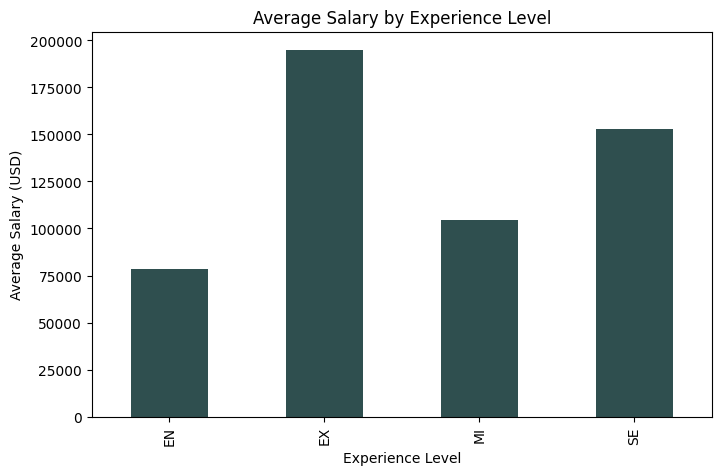

In [7]:
#1. How many unique job titles are there?
jobs = salary['job_title'].unique()
print(f'There are  {len(jobs)} unique title .')

#2. What is the average salary (salary_in_usd) per work_year?
average_salary_per_year = salary.groupby('work_year')[['salary_in_usd']].mean().reset_index()
print(average_salary_per_year)


#3. Create a bar plot showing average salary by `experience_level`.
salary_by_exp = salary.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize=(8,5))
salary_by_exp.plot(kind='bar', color='darkslategray')
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [11]:
# Example: Encode experience_level
le = LabelEncoder()
salary['experience_level_encoded'] = le.fit_transform(salary['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = salary[features]
y = salary['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [12]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [13]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
   <p> In my opinion, the model makes somewhat reasonable predictions, we know that salary tends to increase with base on the what job someone has along with how many year they work and with the experience level they already had. However, salaries can be influenced by many other factors—such as job title, company size, and location.</p>
3. What are the limitations of using only `work_year` and `experience_level`?
   <p>Using only work year and experience level to predict salary makes it less accurate in showing how salaries really work in the real world. Salaries depend on many factors besides experiencee and the year someone worked. For instance, different job roles have very  different pay levels. The salary differ between a Machine Learning Enginneer and Data Analyst, these happens because some jobs really require more advanced skills, have nore bigger responsibilities. </p>
5. How could you improve this model? (Think: more features, better encoding, etc.)
    <p>To improve this model, I would include more features that actually affect a person's salary, not just the level of experience they had or how  many years they work. Real world salaries atre influenced by many factors susch as job title, company size and whether the job is remote or on site. Similarly, bigger companies often pay higher salaries than smaller ones. Including these additional features would help the model understand these important differences and make more accurate predictions.</p>
6. Why is **R² not enough** to trust your predictions?
   <p>R-squared alone isn't enough to fully trust a model's predictions, since it only shows how well the model fits the data it learned from, not how well it works with new data. A model can have a high R-squared value but still make wrong predictions if it's too specific; that is, it has focused on meaningless details or specific data. Also, R-squared doesn't show if the model is biased or missing important things—it just measures how well the chosen factors explain the differences in pay</p>

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀